In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-recognition/sampleSubmission.csv
/kaggle/input/fruit-recognition/test/test/0664.jpg
/kaggle/input/fruit-recognition/test/test/1269.jpg
/kaggle/input/fruit-recognition/test/test/3863.jpg
/kaggle/input/fruit-recognition/test/test/2193.jpg
/kaggle/input/fruit-recognition/test/test/0733.jpg
/kaggle/input/fruit-recognition/test/test/3750.jpg
/kaggle/input/fruit-recognition/test/test/2008.jpg
/kaggle/input/fruit-recognition/test/test/2081.jpg
/kaggle/input/fruit-recognition/test/test/0106.jpg
/kaggle/input/fruit-recognition/test/test/0375.jpg
/kaggle/input/fruit-recognition/test/test/3919.jpg
/kaggle/input/fruit-recognition/test/test/3757.jpg
/kaggle/input/fruit-recognition/test/test/4489.jpg
/kaggle/input/fruit-recognition/test/test/3138.jpg
/kaggle/input/fruit-recognition/test/test/3417.jpg
/kaggle/input/fruit-recognition/test/test/5307.jpg
/kaggle/input/fruit-recognition/test/test/5039.jpg
/kaggle/input/fruit-recognition/test/test/4407.jpg
/kaggle/input/fruit-recogniti

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/fruit-recognition/sampleSubmission.csv')
df.head()

,id,label
0,0,Apple Braeburn
1,1,Apple Braeburn
2,2,Apple Braeburn
3,3,Apple Braeburn
4,4,Apple Braeburn


In [4]:
df.columns

Index(['id', 'label'], dtype='object')

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [6]:
import os
import cv2
import numpy as np

# Path to training images
data_path = '/kaggle/input/fruit-recognition/train/train'
classes = os.listdir(data_path)

features = []
labels = []

# Extract color histogram as features
for label in classes:
    folder = os.path.join(data_path, label)
    
    # ✅ Check if it's a folder (some paths might not be)
    if not os.path.isdir(folder):
        continue
    
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        
        # ✅ Check if it's a file and has an image extension
        if not os.path.isfile(img_path) or not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping unreadable image: {img_path}")
            continue

        img = cv2.resize(img, (64, 64))

        # Convert to HSV and compute histogram
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([hsv], [0, 1, 2], None, [4, 4, 4], [0, 180, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        features.append(hist)
        labels.append(label)

In [7]:
# Convert to array
X = np.array(features)
y = np.array(labels)

In [8]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predict on validation set
y_pred = model.predict(X_val)

# Show accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 1.0

Classification Report:
                     precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00       112
Apple Granny Smith       1.00      1.00      1.00       108
           Apricot       1.00      1.00      1.00       110
           Avocado       1.00      1.00      1.00        76
            Banana       1.00      1.00      1.00       104
         Blueberry       1.00      1.00      1.00        90
      Cactus fruit       1.00      1.00      1.00       101
        Cantaloupe       1.00      1.00      1.00        87
            Cherry       1.00      1.00      1.00        84
        Clementine       1.00      1.00      1.00        90
              Corn       1.00      1.00      1.00        90
     Cucumber Ripe       1.00      1.00      1.00        67
        Grape Blue       1.00      1.00      1.00       206
              Kiwi       1.00      1.00      1.00        93
             Lemon       1.00      1.00      1.00       107


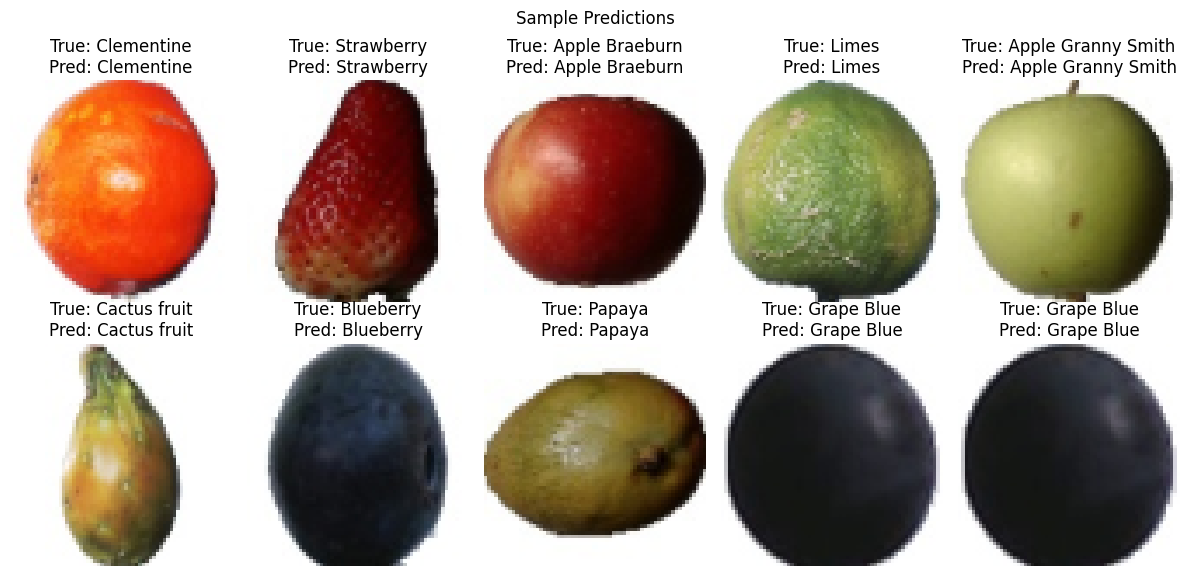

In [11]:
# Show a few sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle("Sample Predictions")

for i, ax in enumerate(axes.flat):
    img_path = os.path.join(data_path, y_val[i])
    img_file = os.listdir(os.path.join(data_path, y_val[i]))[0]
    img = cv2.imread(os.path.join(img_path, img_file))
    img = cv2.resize(img, (64, 64))[:, :, ::-1]  # Convert BGR to RGB
    
    ax.imshow(img)
    ax.set_title(f"True: {y_val[i]}\nPred: {y_pred[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()